In [1]:
from sklearn.datasets import make_classification #Generar
import matplotlib.pyplot as plt
import numpy as np
import heapq ##Heap
from collections import Counter
import operator

# Generamos un dataset randómico

In [7]:
X, Y = make_classification(n_features=2, 
                           n_redundant=0, 
                           n_informative=1, 
                           n_clusters_per_class=1)

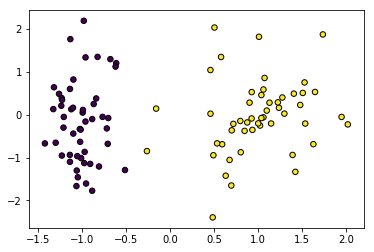

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=30, edgecolors='k')

In [4]:
#np.save('X_knn', X)
#np.save('Y_knn', Y)

# Cargamos el dataset pre generado

In [9]:
X_train = np.load('X_knn.npy')
Y_train = np.load('Y_knn.npy')

In [18]:
X_train.shape

(100, 2)

In [10]:
def plot_dataset(X, Y):
    plt.scatter(X[:, 0], X[:, 1], 
            marker='o', 
            c=Y, 
            s=30, edgecolors='k')

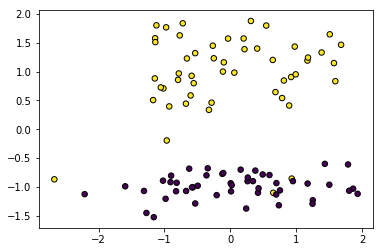

In [11]:
plot_dataset(X_train, Y_train)
plt.show()

# Generamos un punto aleatorio

In [50]:
q = np.random.uniform(low=-1.6, high=2.1, size=(1, 2))

In [51]:
print('Punto de consulta:', q[0])
print(q.shape)

Punto de consulta: [0.43440625 1.30585431]
(1, 2)


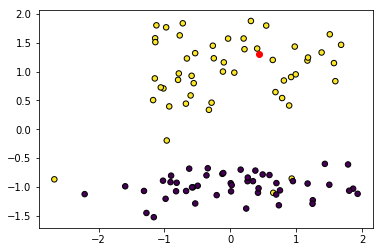

In [52]:
plot_dataset(X_train, Y_train)
plt.plot(q[0][0], q[0][1], 'ro')

## Calculamos todas las distancias con q
## Y vamos guardando en un heap

In [ ]:
x = [1, 1]
q = [2, 2]

sqrt( (1 - 2)^2 + (1 - 2)^2 )

$$
d(p1, p2) = \sqrt{\sum_i^m (p_{1i} - p_{2i})^2}
$$

In [69]:
def knn(X, Y, query, k):
    h = []
    heapq.heapify(h)
    for x, y in zip(X, Y):
        d = np.sqrt(np.sum((x - query)**2))
        heapq.heappush(h, (d, y))
        
    k_n = [y_i[1] for y_i in h[:k]]
    
    print(k_n)
    print()
    print(sorted(Counter(k_n).items(), key=operator.itemgetter(1) ))
    print()
    print(reversed(sorted(Counter(k_n).items(), key=operator.itemgetter(1) )))
    print()
    #print(Counter(k_n))
    counts = list(reversed(sorted(Counter(k_n).items(), key=operator.itemgetter(1) )))
    print(counts)
    
    ##El elemento 0
    ##La clase, elemento 0 de la tupla
    #(class, n_elements)
    return counts[0][0]

## Predicciones

In [71]:
#knn(np.asarray([[1, 1], [2, 2], [3, 3]]), [3, 2, 1], np.asarray([0.5, 0.5]))
pred = knn(X_train, Y_train, np.squeeze(q), 30)
print()
print(pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]

[(0, 2), (1, 28)]


[(1, 28), (0, 2)]

1


In [54]:
X_new = X_train.copy()
Y_new = Y_train.copy()

print(X_new.shape)
print(Y_new.shape)

(100, 2)
(100,)


In [55]:
X_new = np.vstack((X_train, q))
Y_new = np.hstack((Y_train, pred))

print(X_new.shape)
print(Y_new.shape)

(101, 2)
(101,)


## 0: lila
## 1: amarillo

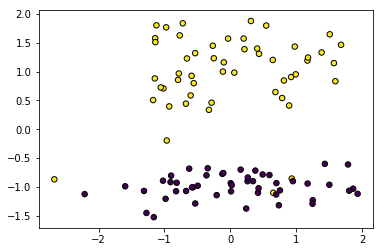

In [56]:
plot_dataset(X_new, Y_new)

# Sklearn

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model = KNeighborsClassifier(n_neighbors=30)
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [57]:
print(np.squeeze(q))
print(q)

[0.43440625 1.30585431]
[[0.43440625 1.30585431]]


In [58]:
model.predict(q)

array([1])